In [4]:
%pip install pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town 
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population


In [5]:
import pandas as pd
df = pd.read_csv('./data.data', header=None, sep='\s+')
df.columns = ["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


/Users/anotherdev/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


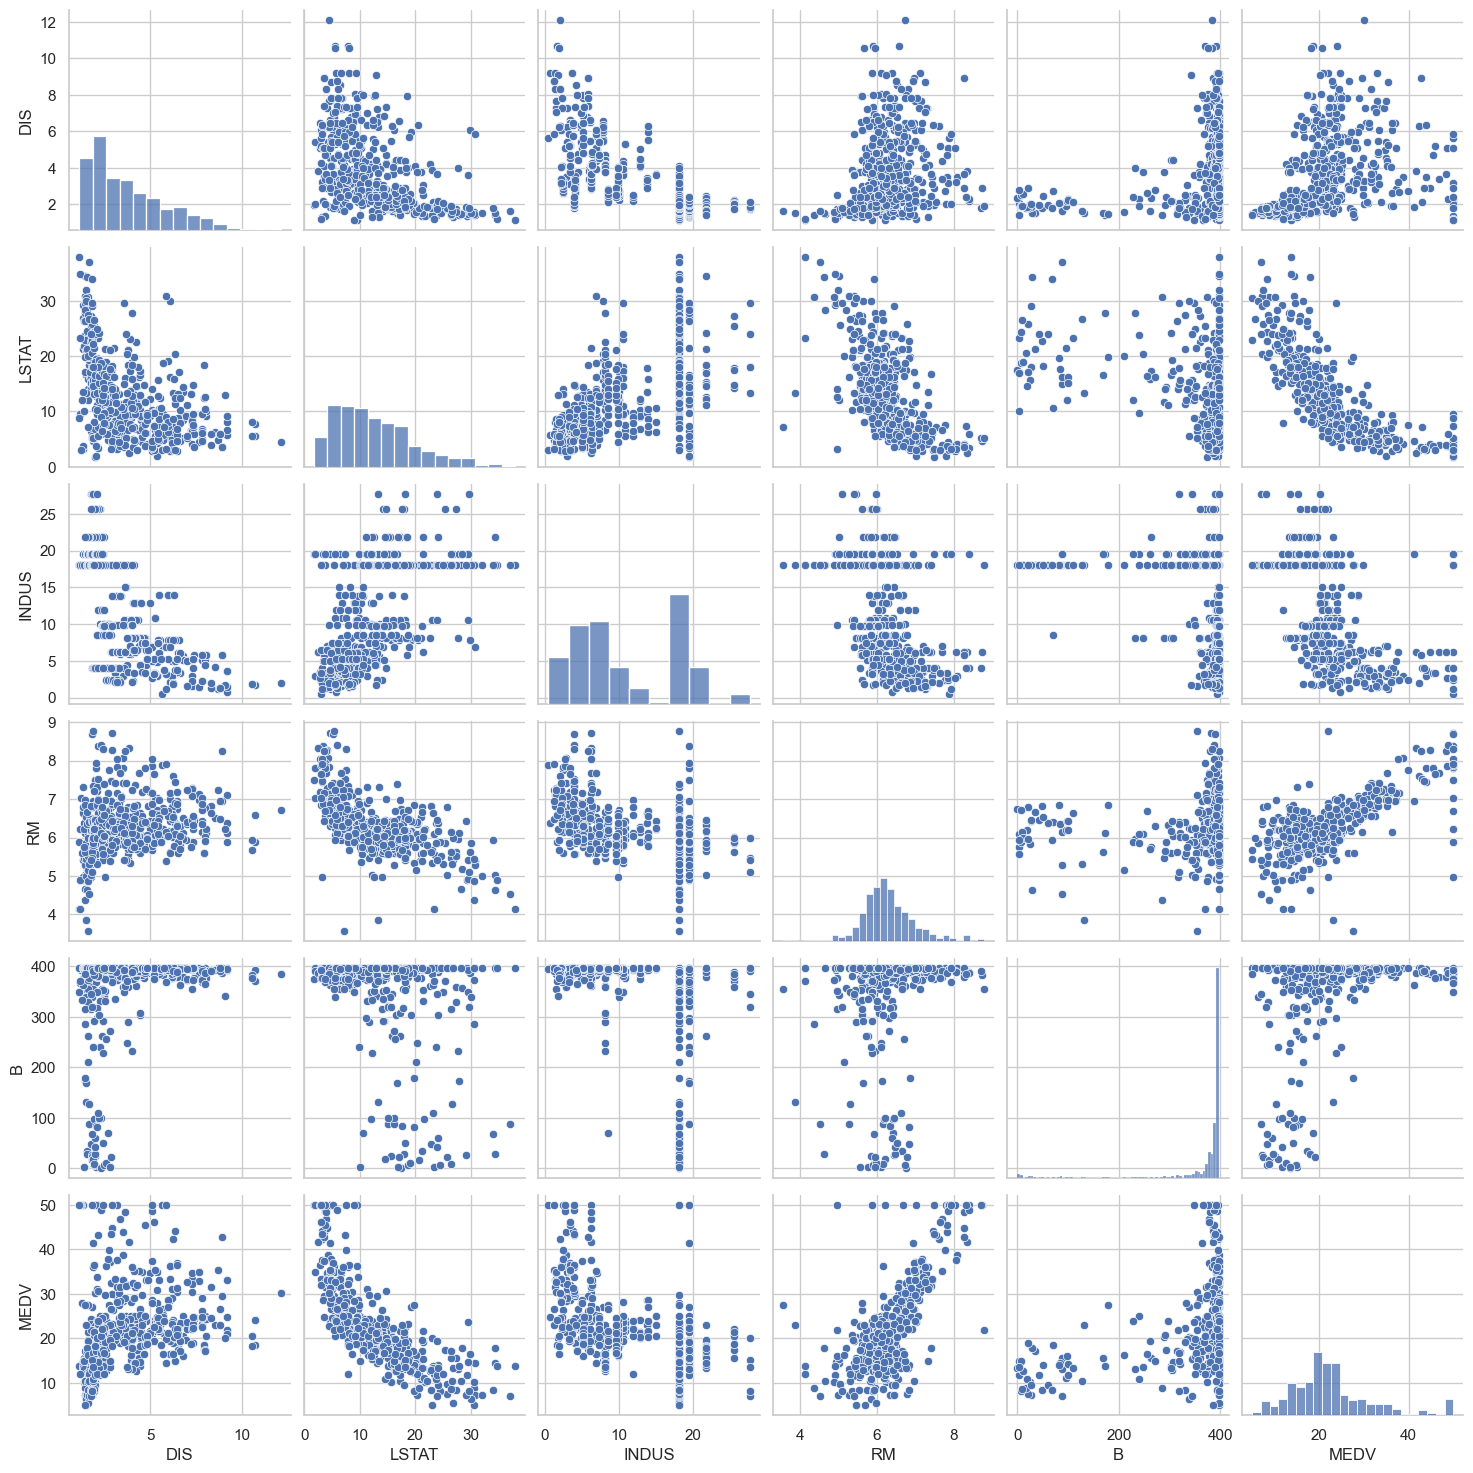

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="notebook")
cols = ["DIS", "LSTAT", "INDUS", "RM", "B", "MEDV"]
sns.pairplot(df[cols], size=2.5)

<Axes: >

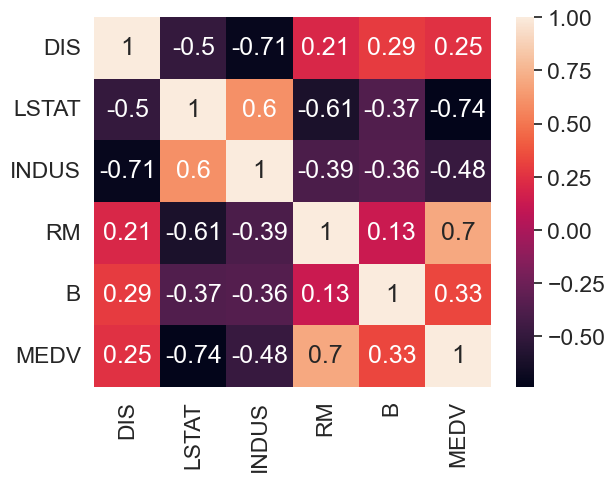

In [7]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

Text(0, 0.5, "Median value of home in $1000's")

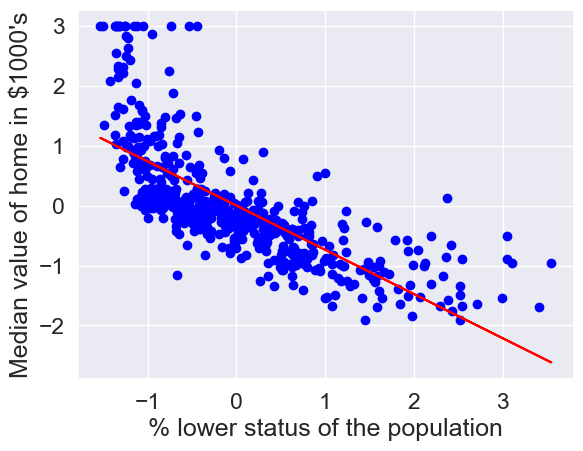

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x = df['LSTAT'].values.reshape(-1 , 1)
y = df['MEDV'].values.reshape(-1 , 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std =sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)

plt.scatter(x_std, y_std, c='blue')
plt.plot(x_std, slr.predict(x_std), color='red')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of home in $1000's")

In [15]:
dummy_value = 10
num_std = sc_x.transform(np.array([dummy_value]).reshape(-1 , 1))
print("Price of a house with", dummy_value, "% of LSP is:" , sc_y.inverse_transform(slr.predict(num_std)), "$")

Price of a house with 10 % of LSP is: [[25.05334734]] $
